In [149]:
import sys
sys.path.insert(1, '/storage/home/nxt5197/work/530_stellar_atmospheres/lib/')
import os
import astropy
from astropy.modeling import models
from astropy import units as u
from astropy import constants as const
from astropy.modeling.models import BlackBody
from astropy.visualization import quantity_support
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as tick
from statmospheres import Planck_array_at_temp

In [150]:
# figure(figsize=(12, 8), dpi=80)
axis_label_size = 16
axis_tick_label_size = 12

In [151]:
num_points=100
wave_numbers=np.linspace(0,12,num_points)/u.um
wave_numbers=wave_numbers[1:]
input=(wave_numbers*const.c).to(u.Hz)
Ts=[10000,7000,3000]*u.K

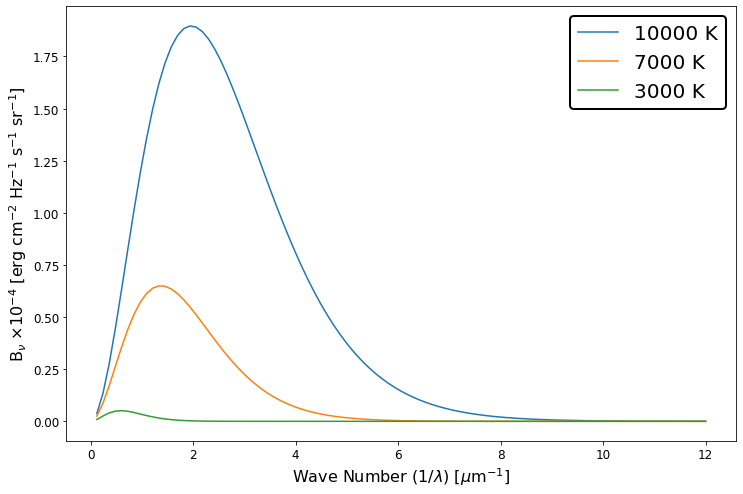

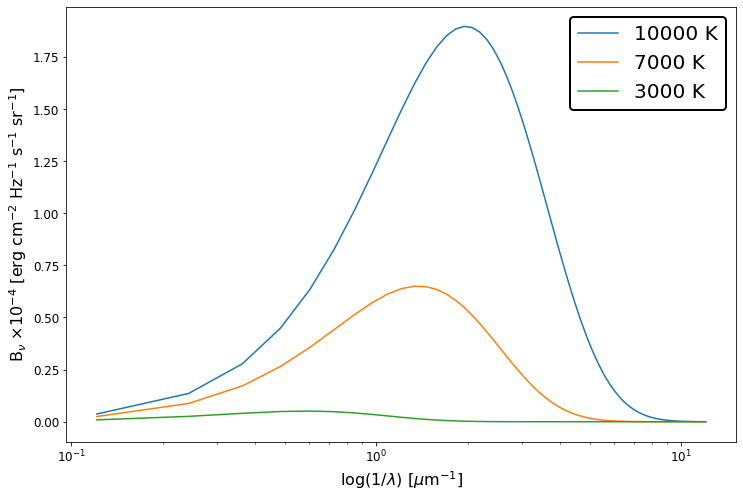

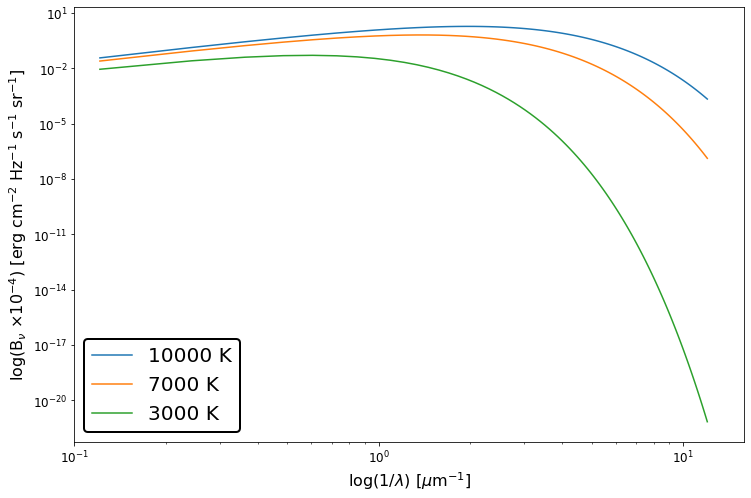

In [152]:
axis_label_size = 16
axis_tick_label_size = 12
for p in range(3):
    fig = plt.figure(figsize=(12, 8))
    ax=fig.add_subplot(111)
    for T in Ts:
        my_B_nus = Planck_array_at_temp(T=T,nu_array=input)
        ax.plot(wave_numbers,my_B_nus/10**-4,label=f'{np.int64(T)} K')
        plt.xticks(fontsize=axis_tick_label_size)
        plt.yticks(fontsize=axis_tick_label_size)
    if p == 0:
        x = y = 'lin'
        plt.xlabel(r'Wave Number (1/$\lambda$) [$\mu$m$^{-1}$]', fontsize=axis_label_size)
        plt.ylabel(r'B$_\nu$ $\times$10$^{-4}$ [erg cm$^{-2}$ Hz$^{-1}$ s$^{-1}$ sr$^{-1}$]', fontsize=axis_label_size)
    if p == 1:
        x = 'log'
        plt.xscale('log')
        y = 'lin'
        plt.xlabel(r'log(1/$\lambda$) [$\mu$m$^{-1}$]', fontsize=axis_label_size)
        plt.ylabel(r'B$_\nu$ $\times$10$^{-4}$ [erg cm$^{-2}$ Hz$^{-1}$ s$^{-1}$ sr$^{-1}$]', fontsize=axis_label_size)
    if p == 2:
        x = y = 'log'
        plt.xscale('log')
        plt.yscale('log')
        # ax.xaxis.set_minor_formatter(FormatStrFormatter('%.1f'))
        plt.xlim(10**-1,10**1.2)
        # plt.ylim(10**-3,10**1)
        plt.xlabel(r'log(1/$\lambda$) [$\mu$m$^{-1}$]', fontsize=axis_label_size)
        plt.ylabel(r'log(B$_\nu$ $\times$10$^{-4}$) [erg cm$^{-2}$ Hz$^{-1}$ s$^{-1}$ sr$^{-1}$]', fontsize=axis_label_size)
    legend=plt.legend(prop={'size':20})
    legend.get_frame().set_linewidth(2)
    legend.get_frame().set_edgecolor('black')
    legend.get_frame().set_alpha(1)
    path_png=os.getcwd()+f'/HW_01_plots/my_{x}_{y}.jpg'
    plt.savefig(path_png,bbox_inches='tight',dpi=150)
    plt.show()

In [153]:
num_points=100
wave_numbers=np.linspace(0,12,num_points)/u.um
wave_numbers=wave_numbers[1:]
input=(1/(wave_numbers)).to(u.AA)
Ts=[10000,7000,3000]*u.K
df=pd.DataFrame({'wave_numbers':wave_numbers,'wavelength':input})

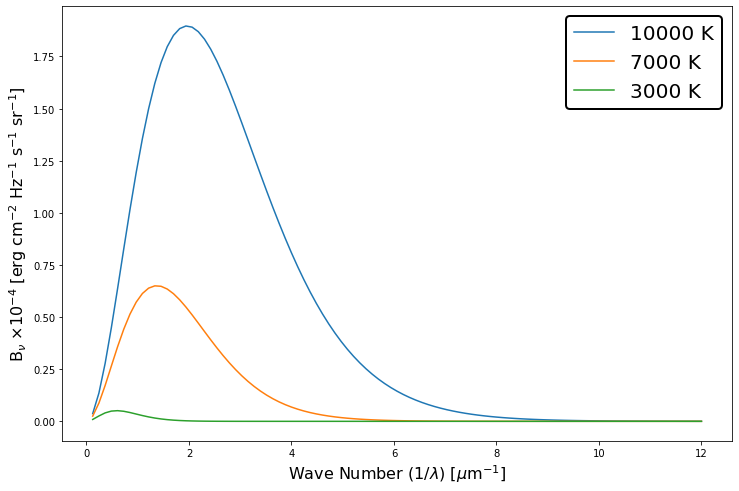

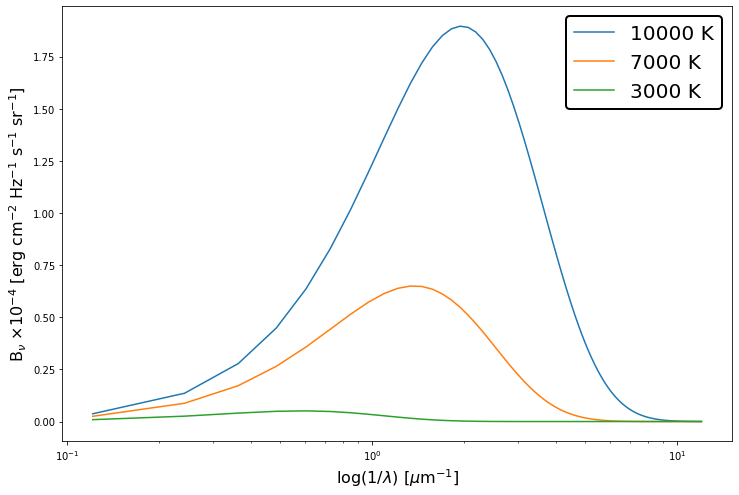

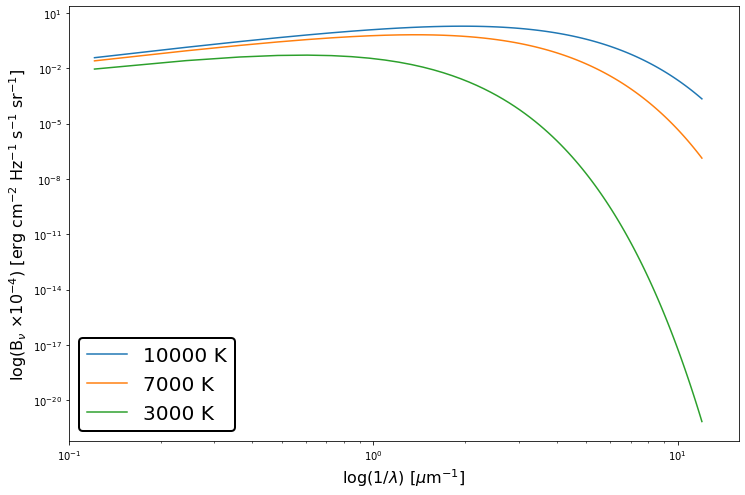

In [154]:
axis_label_size = 16
axis_tick_label_size = 12
for p in range(3):
    fig = plt.figure(figsize=(12, 8))
    ax=fig.add_subplot(111)
    for T in Ts:
        bb = models.BlackBody(temperature=T)
        flux = bb(input)
        with quantity_support():
            ax.plot(wave_numbers,flux/10**-4,label=f'{np.int64(T)} K')
    if p == 0:
        x = y = 'lin'
        plt.xlabel(r'Wave Number (1/$\lambda$) [$\mu$m$^{-1}$]', fontsize=axis_label_size)
        plt.ylabel(r'B$_\nu$ $\times$10$^{-4}$ [erg cm$^{-2}$ Hz$^{-1}$ s$^{-1}$ sr$^{-1}$]', fontsize=axis_label_size)
    if p == 1:
        x = 'log'
        plt.xscale('log')
        y = 'lin'
        plt.xlabel(r'log(1/$\lambda$) [$\mu$m$^{-1}$]', fontsize=axis_label_size)
        plt.ylabel(r'B$_\nu$ $\times$10$^{-4}$ [erg cm$^{-2}$ Hz$^{-1}$ s$^{-1}$ sr$^{-1}$]', fontsize=axis_label_size)
    if p == 2:
        x = y = 'log'
        plt.xscale('log')
        plt.yscale('log')
        # ax.xaxis.set_minor_formatter(FormatStrFormatter('%.1f'))
        plt.xlim(10**-1.0,10**1.2)
        # plt.ylim(10**-3,10**1)
        plt.xlabel(r'log(1/$\lambda$) [$\mu$m$^{-1}$]', fontsize=axis_label_size)
        plt.ylabel(r'log(B$_\nu$ $\times$10$^{-4}$) [erg cm$^{-2}$ Hz$^{-1}$ s$^{-1}$ sr$^{-1}$]', fontsize=axis_label_size)
    legend=plt.legend(prop={'size':20})
    legend.get_frame().set_linewidth(2)
    legend.get_frame().set_edgecolor('black')
    legend.get_frame().set_alpha(1)
    path_png=os.getcwd()+f'/HW_01_plots/model_{x}_{y}.jpg'
    plt.savefig(path_png,bbox_inches='tight',dpi=150)
    plt.show()

In [155]:
num_points=100
wave_numbers=np.linspace(0,12,num_points)/u.um
wave_numbers=wave_numbers[1:]
my_input=(wave_numbers*const.c).to(u.Hz)
bb_input=(1/(wave_numbers)).to(u.AA)
Ts=[10000,7000,3000]*u.K

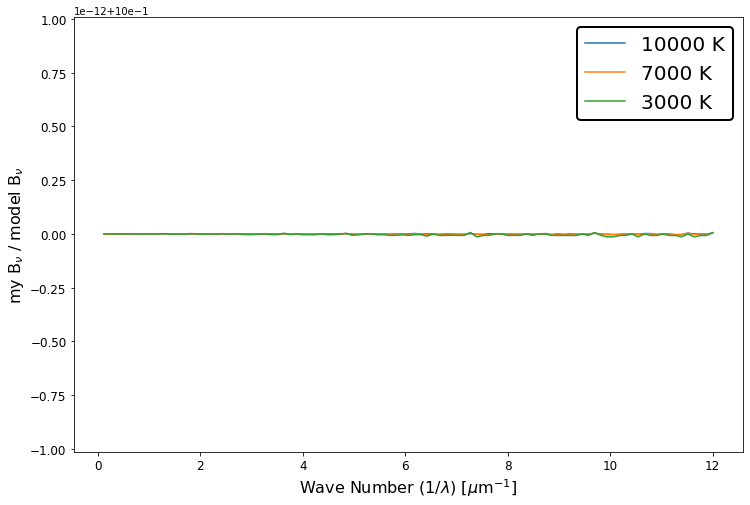

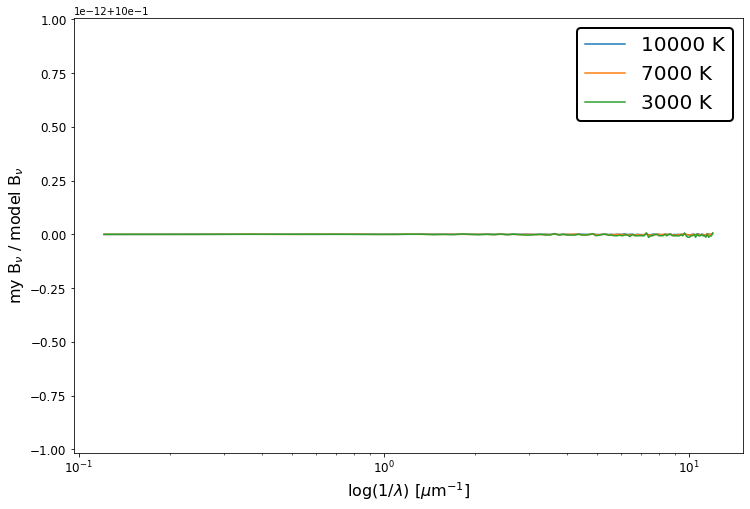

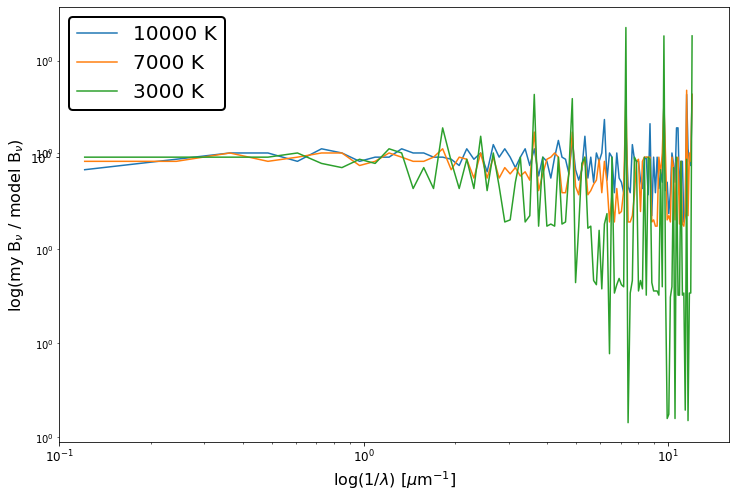

In [156]:
axis_label_size = 16
axis_tick_label_size = 12
for p in range(3):
    fig = plt.figure(figsize=(12, 8))
    ax=fig.add_subplot(111)
    for T in Ts:
        my_B_nus = Planck_array_at_temp(T=T,nu_array=my_input)
        bb = models.BlackBody(temperature=T)
        flux = bb(input)
        with quantity_support():
            ax.plot(wave_numbers,my_B_nus/flux,label=f'{np.int64(T)} K')
            plt.xticks(fontsize=axis_tick_label_size)
            plt.yticks(fontsize=axis_tick_label_size)
    if p == 0:
        x = y = 'lin'
        plt.xlabel(r'Wave Number (1/$\lambda$) [$\mu$m$^{-1}$]', fontsize=axis_label_size)
        plt.ylabel(r'my B$_\nu$ / model B$_\nu$', fontsize=axis_label_size)
    if p == 1:
        x = 'log'
        plt.xscale('log')
        y = 'lin'
        plt.xlabel(r'log(1/$\lambda$) [$\mu$m$^{-1}$]', fontsize=axis_label_size)
        plt.ylabel(r'my B$_\nu$ / model B$_\nu$', fontsize=axis_label_size)
    if p == 2:
        x = y = 'log'
        plt.xscale('log')
        plt.yscale('log')
        # ax.xaxis.set_minor_formatter(FormatStrFormatter('%.1f'))
        plt.xlim(10**-1.0,10**1.2)
        # plt.ylim(10**-3,10**1)
        plt.xlabel(r'log(1/$\lambda$) [$\mu$m$^{-1}$]', fontsize=axis_label_size)
        plt.ylabel(r'log(my B$_\nu$ / model B$_\nu$)', fontsize=axis_label_size)
    legend=plt.legend(prop={'size':20})
    legend.get_frame().set_linewidth(2)
    legend.get_frame().set_edgecolor('black')
    legend.get_frame().set_alpha(1)
    path_png=os.getcwd()+f'/HW_01_plots/ratio_{x}_{y}.jpg'
    plt.savefig(path_png,bbox_inches='tight',dpi=150)
    plt.show()